## Тема “Обучение без учителя”

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


>С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
X_train = pd.read_pickle('boston_X_train.pkl')
X_train_scaled=pd.read_pickle('boston_X_train_scaled.pkl')
X_train_tsne=pd.read_pickle('boston_X_train_tsne.pkl')
y_train = pd.read_pickle('boston_y_train.pkl')

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [76]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [77]:
import pickle

with open('kmeans_boston.pkl', 'wb') as fid:
    pickle.dump(kmeans, fid) 

In [78]:
labels_train.shape

(404,)

In [79]:
kmeans.cluster_centers_

array([[-0.39886419,  1.55761113, -1.01661835, -0.09789972, -1.11157102,
         0.4694394 , -1.31625943,  1.43008074, -0.59047541, -0.58513831,
        -0.60269912,  0.35449756, -0.82802167],
       [ 0.81090356, -0.50032012,  1.12900228,  0.08796453,  1.14538259,
        -0.49660815,  0.77912417, -0.85778857,  1.2424768 ,  1.31237242,
         0.60373924, -0.65731177,  0.90021762],
       [-0.35959388, -0.36865917, -0.29295347, -0.014409  , -0.26109152,
         0.1188348 ,  0.07460493, -0.07354866, -0.56028098, -0.60915918,
        -0.1300668 ,  0.277444  , -0.22574751]])

In [80]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

>Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

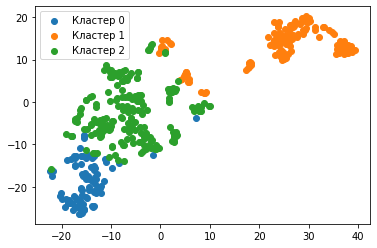

In [81]:
plt.scatter(X_train_tsne[0][labels_train==0], X_train_tsne[1][labels_train==0], label='Кластер 0')
plt.scatter(X_train_tsne[0][labels_train==1], X_train_tsne[1][labels_train==1], label='Кластер 1')
plt.scatter(X_train_tsne[0][labels_train==2], X_train_tsne[1][labels_train==2], label='Кластер 2')
plt.legend()
plt.show()

>Вычислите средние значения price и CRIM в разных кластерах.

In [82]:
print('Средняя цена по всей выборки: ', y_train.Price.mean())
print('Средняя цена Кластер 0 : ', y_train.Price[labels_train==0].mean())
print('Средняя цена Кластер 1 : ', y_train.Price[labels_train==1].mean())
print('Средняя цена Кластер 2 : ', y_train.Price[labels_train==2].mean())

Средняя цена по всей выборки:  22.796534653465343
Средняя цена Кластер 0 :  27.78837209302326
Средняя цена Кластер 1 :  16.165354330708663
Средняя цена Кластер 2 :  24.958115183246072


In [83]:
print('Среднее значение CRIM Кластер 0 :', X_train.loc[labels_train==0, 'CRIM'].mean())
print('Среднее значение CRIM Кластер 1 :', X_train.loc[labels_train==1, 'CRIM'].mean())
print('Среднее значение CRIM Кластер 2 :', X_train.loc[labels_train==2, 'CRIM'].mean())

Среднее значение CRIM Кластер 0 : 0.07356558139534884
Среднее значение CRIM Кластер 1 : 10.797028425196851
Среднее значение CRIM Кластер 2 : 0.4216602094240837
